# Sentiment analysis using classical ml methods

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import time
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn import metrics

import warnings

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
file_path = 'data\\Twitter_Data.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139424 entries, 0 to 139423
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  139423 non-null  object 
 1   category    139422 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.1+ MB


In [ ]:
df.isna().sum()

,0
clean_text,1
category,2


In [ ]:
df.dropna(subset=['clean_text'], inplace=True)
df.dropna(subset=['category'], inplace=True)

In [ ]:
df.isna().sum()

,0
clean_text,0
category,0


### Data Visualization

category
 1.0    61754
 0.0    47203
-1.0    30464
Name: count, dtype: int64


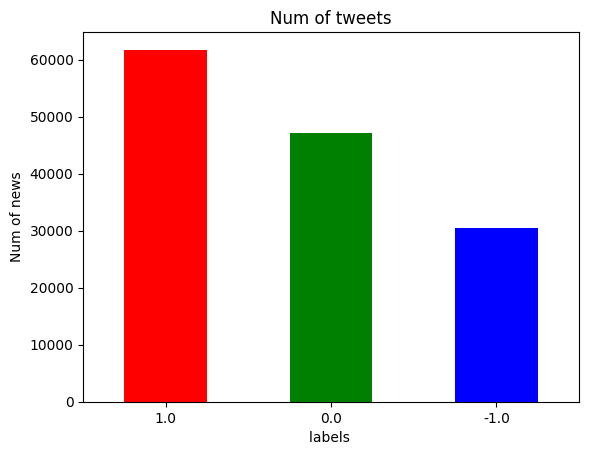

In [ ]:
labels_num = df['category'].value_counts()
print(labels_num)
labels_num.plot(kind='bar', color=['red', 'green', 'blue'])


plt.title('Num of tweets')
plt.xlabel('labels ')
plt.ylabel('Num of news')
plt.xticks(rotation=0)
plt.show()

### Data Preprocessing

In [ ]:
# Applying TFIDF Vectorization
tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1,3), stop_words="english" )
X_tfidf = tfidf.fit_transform(df["clean_text"]).toarray()

In [ ]:
# Train test Split
X_train_tfidf,X_test_tfidf,Y_train_tfidf,Y_test_tfidf = train_test_split(X_tfidf, df["category"], test_size=0.1,random_state = 42)

### Training

In [ ]:
def model_train(model, vectorized_data, model_name, params = None):
    warnings.filterwarnings('ignore')

    x_train, x_test, y_train, y_test = vectorized_data

    start_time = time.time()

    model.fit(x_train, y_train)

    end_time = time.time()

    start_test_time = time.time()

    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)

    y_pred = model.predict(x_test)

    end_test_time = time.time()

    print(model_name)
    print(' ')

    print("Train accuracy: ", train_score)
    print("Test accuracy:  ", test_score)

    print(classification_report(y_test, y_pred))

    print(' ')
    print('Training time: ', end_time - start_time)
    print(' ')
    print('Test time: ',end_test_time - start_test_time)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_train(LogisticRegression(solver='liblinear'), (X_train_tfidf, X_test_tfidf, Y_train_tfidf,Y_test_tfidf), 'LogisticRegression')

LogisticRegression
 
Train accuracy:  0.8563015030523279
Test accuracy:   0.837696335078534
              precision    recall  f1-score   support

        -1.0       0.85      0.71      0.77      3071
         0.0       0.79      0.95      0.86      4764
         1.0       0.88      0.82      0.85      6108

    accuracy                           0.84     13943
   macro avg       0.84      0.82      0.83     13943
weighted avg       0.84      0.84      0.84     13943

 
Training time:  5.218099355697632
 
Test time:  0.7114434242248535


### Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model_train(MultinomialNB(alpha=0.1), (X_train_tfidf, X_test_tfidf, Y_train_tfidf,Y_test_tfidf), 'MultinomialNB')

MultinomialNB
 
Train accuracy:  0.7417874049634199
Test accuracy:   0.7182098544072294
              precision    recall  f1-score   support

        -1.0       0.80      0.50      0.61      3071
         0.0       0.78      0.68      0.73      4764
         1.0       0.67      0.86      0.75      6108

    accuracy                           0.72     13943
   macro avg       0.75      0.68      0.70     13943
weighted avg       0.73      0.72      0.71     13943

 
Training time:  0.7426960468292236
 
Test time:  0.7085342407226562


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
model_train(DecisionTreeClassifier(min_samples_split=50, max_depth=19), (X_train_tfidf, X_test_tfidf, Y_train_tfidf,Y_test_tfidf), 'DecisionTreeClassifier')

DecisionTreeClassifier
 
Train accuracy:  0.5954828734917674
Test accuracy:   0.5849530230223051
              precision    recall  f1-score   support

        -1.0       0.79      0.20      0.31      3071
         0.0       0.50      0.86      0.63      4764
         1.0       0.69      0.57      0.62      6108

    accuracy                           0.58     13943
   macro avg       0.66      0.54      0.52     13943
weighted avg       0.65      0.58      0.56     13943

 
Training time:  85.2083330154419
 
Test time:  0.8287065029144287


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_train(KNeighborsClassifier(n_neighbors=4, weights='distance'), (X_train_tfidf, X_test_tfidf, Y_train_tfidf,Y_test_tfidf), 'KNeighborsClassifier')

KNeighborsClassifier
 
Train accuracy:  0.9971787883134893
Test accuracy:   0.47443161443018
              precision    recall  f1-score   support

        -1.0       0.76      0.16      0.27      3071
         0.0       0.40      0.93      0.56      4764
         1.0       0.78      0.28      0.41      6108

    accuracy                           0.47     13943
   macro avg       0.65      0.46      0.41     13943
weighted avg       0.65      0.47      0.43     13943

 
Training time:  0.2882654666900635
 
Test time:  1186.6810491085052
